# Probability with Bayesian networks in Python

## Gašper Štukelj
### Munich Center for Mathematical Philosophy (MCMP) / Graduate school of Systemic Neurosciences (GSN)

## What is this all about?

### ¤ Bootstraping Bayes' theorem to frequencies (numpy)
### ¤ Creating and visualizing graphs (networkx)
### ¤ Using graphs to represent probabilities and make inferences (pgmpy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image
import ipywidgets as widgets 

%matplotlib inline
style.use('seaborn-poster')

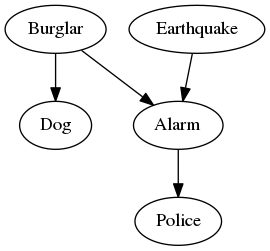

In [4]:
Image('graph.png', width=300)

# A BN is a DAG - Directed acyclic graph (arrows have directions, and we can never start and end at the 
# same node just by following the direction of the edges)

In [5]:
# Bayes' theorem is what puts the B in the things Bayesian:

$$\LARGE P(H \mid E) = \dfrac{P(E \mid H) \cdot P(H)}{P(E)}$$

In [6]:
# For the ease of exposition, say that 'H' stand for a specific hypothesis and 'E' stands for 'evidence' (data).
# The right term is often called 'posterior' probability - BT gives an answer to a very simple question: 
# 'What is the probability of H, after I have observed (learned that) E?' We can see that this 'conditional' 
# probability is dependent on three different terms: two uncoditional or 'marginal' probabilities P(H) and 
# P(E) are often called 'prior' probabilities in this context, because they correspond to prior confidence we 
# had in (or probability we assigned to) the hypothesis being true P(H) and data/evidence being observed P(E).
# The third term is also a conditional probability and it quantifies the strength with which our hypothesis 
# predicted that this evidence will be observed, that is 'how likely' the evidence was considered by the 
# hypothesis/theory before it was actually observed, hence the term is often called 'the likelihood'. One last
# thing to note is that Bayes theorem tells us that everything else kept the same (fixing the other terms),
# the posterior will be higher for the theory we considered more likely beforehand, or for the theory that 
# assigned more probabilitiy to the evidence, and last but not least the posterior will be higher if what we
# observe is something we didn't considered to be likely (low P(E)). One intuitive consequence of the latter is
# that the data for which we're completely certain, i.e. P(E)=1 and P(E|H)=1, will not change our beliefs in
# the truth of the theory.

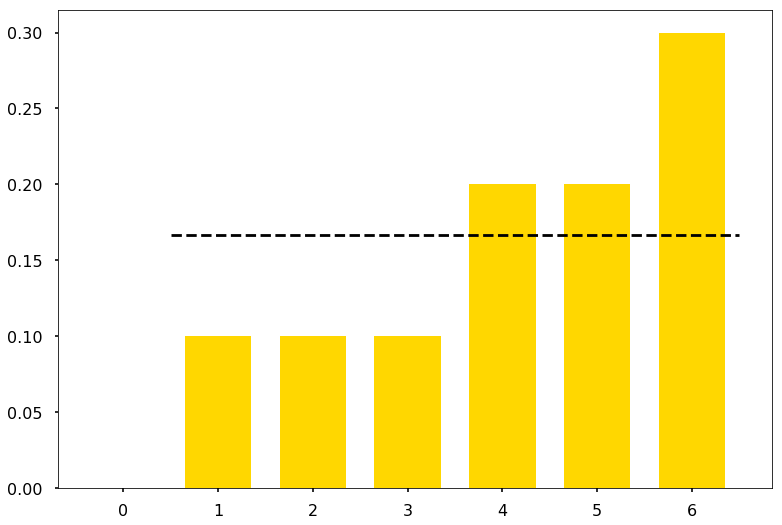

In [7]:
# Let's roll our digital yellow die n-times and count the observed values! Intuitively all the values should
# occur roughly 1/6 of the time. However, we see that this is only the case for higher n. This shows us that
# numerical simulations are warranted if we repeat the "experiment" sufficient amount of times.

n = 10
estimate = 1/6

plt.hist(np.random.randint(low=1, high=7, size=n), bins=range(8), 
             align='left', rwidth=0.7, normed=True,color='gold')

plt.hlines(estimate, xmin=0.5, xmax=6.5, linestyle='--', colors='black');

In [8]:
# Probabilities are values between 0 and 1, an 'impossible' event has a probability 0 and a 'certain' event 
# has probability 1. Probabilities have to sum up to one. Often this restrictions are introduced through the
# choice of axiomatization of the probability theory.

# I trust it is enough for us to accept this restrictions insofar as we want to use the numpy.random module!
# Read the docstring of the numpy.random.choice function and play around with different values to see that 
# probabilities are indeed non-negative and sum up to one.

In [9]:
np.random.choice(['a', 'b', 'c'], p=[0.3, 0.8, 0.1])

ValueError: probabilities do not sum to 1

# Bootstraping Bayes' theorem to frequencies

### We have two dice. The blue one is very biased towards 2. The  yellow one is 'fair', that is, it shows all values equally likely. We will pick the the yellow die with probability $P(Y) = p$ and blue die with probability $P(B) = 1 - p$.

### We'll roll 2 either if we choose a blue die and it rolls 2 or if we choose a yellow die and it rolls 2.

$$\Large P(2) = P(2, B) + P(2, Y) $$

In [10]:
# This is an example of really shabby notation, but it does cut a lot of visual noise. Once you get used to the
# proper notation (see the end of the notebook), avoid writing things in such a bad manner.

### We can think of it as having a 'mixed' - green die, s.t. it behaves like the yellow die for the fraction of throws proportional to the $p$, and the rest of the time as the blue die. 

### We can rewrite $P(2,B)$ as $P(2 \mid B) \cdot P(B)$, and $P(2,Y)$ as $P(2 \mid Y) \cdot P(Y)$, so that we get:

In [11]:
# This factorization actually follows from the standard definition of the conditional probability. It is 
# helpful to think of what happens in the extremes to get the intuitions going. If we set p=0, then the whole
# right part of the sum is zero we expect the green die to behave just like the blue die, that is probability 
# of green die rolling 2 is equal to the probability of rolling two given that we have a blue day. Similarly 
# if we set the p=1, the green die should behave exactly like a yellow die. Hence, the closer the p will be to
# 1 the more we expect the green die to behave like a yellow die, and closer the p is to 0 the more we expect
# the green die to behave like a blue die.

$$ \Large P(2) = P(2 \mid B) \cdot P(B) + P(2 \mid Y) \cdot P(Y) $$

In [12]:
# We define three different dice. The 'mixed' die, is just green die rolled p fraction of the time, and blue
# die rolled (1-p) fraction of the time.

# Notice that both dice, and the 'mixed' die are generated separately!

yellow = lambda s: np.random.randint(low=1, high=7, size=s)
blue = lambda s: np.random.choice([1,2,3,4,5,6], p=[0.12, 0.4, 0.12, 0.12, 0.12, 0.12], size=s)
green = lambda s,p: np.append(yellow(int(n*p)), blue(int(n*(1-p))))

In [13]:
# Again, we're rolling the dice n-times and counting the number of occurences of each of the possible values.
# Try re-running the cell with different n, and then observe how the value of p affects the distributions of
# the dice and their similarity. 

n = 10

def plot_machine(p):
    ax = plt.gca(projection='3d')
    

    ax.bar(np.arange(1,7), np.histogram(yellow(n), normed=True, bins=range(1,8))[0],
           zs=1, zdir='y', alpha=0.9, color='yellow', label='P(2 | G)')

    ax.bar(np.arange(1,7), np.histogram(blue(n), normed=True, bins=range(1,8))[0], 
           zs=3, zdir='y', alpha=0.7, color='blue', label='P(2 | B)')

    ax.bar(np.arange(1,7), np.histogram(green(n,p), normed=True, bins=range(1,8))[0],
           zs=2, zdir='y', alpha=0.8, color='green', label='P(2)')

    ax.legend();
    
    ax.set(yticks=np.arange(1,4), yticklabels=['P(2 | G)', 'P(2)', 'P(2 | B)'])

slider = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5)
widgets.interactive(plot_machine, p=slider)

A Jupyter Widget

###  This should provide some intuition for an expression of a 'joint' probability:

$$ \Large P(H,E) = P(H \mid E) \cdot P(E)$$

### It seem reasonable to assume that $P(H,E) = P(E, H)$, so we can write:

$$ \Large P(H \mid E) \cdot P(E) = P(E \mid H) \cdot P(H) $$

### Diving both sides by $P(E)$ we get the famous Bayes' rule:

$$ \Large P(H \mid E) = \dfrac{P(E \mid H) \cdot P(H)}{P(E)} $$

## Recap

### ¤ Probabilities are non negative and sum up to 1
### ¤ Joint probability can be writen as a product of conditional and marginal probabilities
### ¤ Bayes theorem *is a theorem* and follows from simple algebra
### ¤ Sometimes we can check our probabilistic intuitions with the numpy.random module

# Graphs with networkx

In [14]:
import networkx as nx

In [15]:
# We want to create a directed graph. Despite being based on the networkx, pgmpy - the target library of the 
# talk - doesn't really make use of a lot of nx functionality, besides plotting capacities. Networkx is a fun
# and mature library, I really encourage you to read the documentation and play around with it a bit, because
# this really doesn't do it justice.

In [16]:
# DiGraph stands for 'directed graph', to create and undirected graph skeleton, simply call 'nx.Graph'.
g = nx.DiGraph()

# If you add an edge with a node that doesn't not yet exist, the node is automatically added to the graph.
g.add_edges_from([('Burglar', 'Dog'), ('Burglar','Alarm'), ('Earthquake', 'Alarm'), ('Alarm','Police')])

# In fact you could do this directly with the initialization of a DiGraph object, simply by passing the same
# array of tuples representing the edges to the nx.DiGraph() function:
# nx.DiGraph([('Burglar', 'Dog'), ('Burglar','Alarm'), ('Earthquake', 'Alarm'), ('Alarm','Police')])

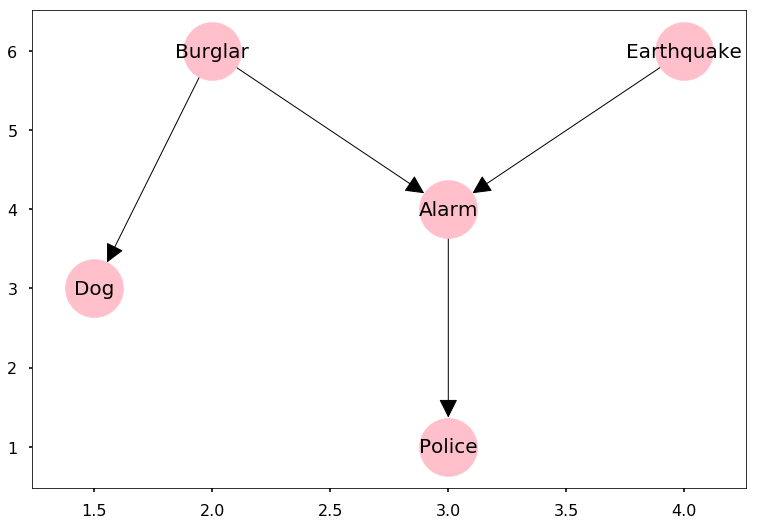

In [17]:
# It's really handy to specify a dictionary with nodes as keys and tuples of x and y coordinates as values:

positions={'Burglar':(2,6), 'Earthquake':(4,6), 'Alarm':(3,4), 'Dog':(1.5,3), 'Police':(3,1)}

# The dict can then be passed as an argument of 'pos' parameter to the function:

nx.draw_networkx(g, node_color='pink', node_size=15**3, font_size=20, arrowsize=40,pos=positions)


# nx.draw* functions rely on the matplotlib.pyplot, so we can use the functionality of the latter as well -
# for instance to save our figure to an external file!

plt.savefig('test.png');


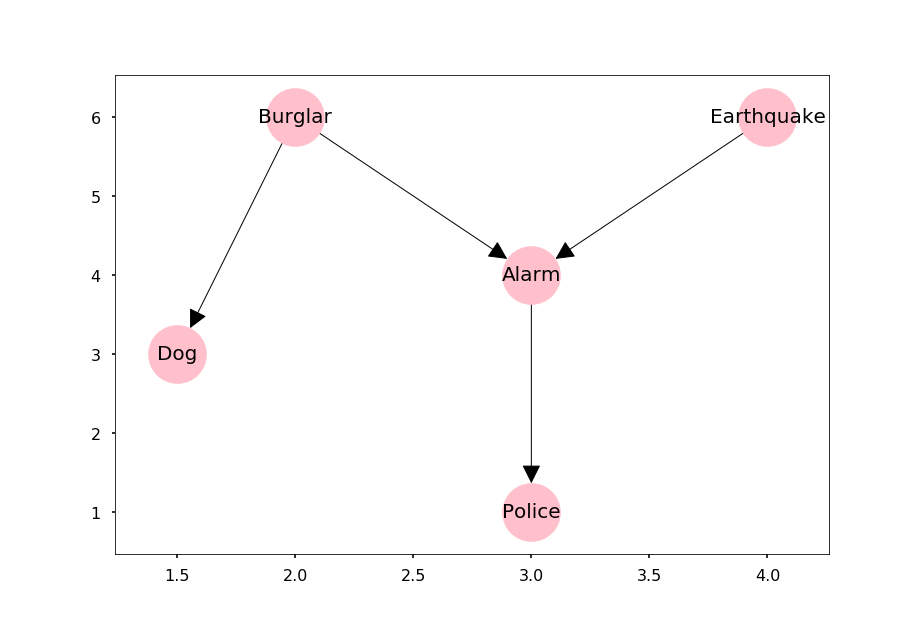

In [18]:
Image('test.png')

### External visualization and saving graph data

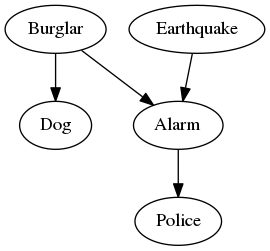

In [19]:
# For this to work you need to have installed GraphViz and python interface pygraphviz. We convert the graph 
# to a pygraphviz AGraph class instance to utilize the functionality of GraphViz. There are other admissible
# values to pass as arguments to the 'prog' parameter, that will results in a different layout of the graph.
# I picked 'dot' because I liked how it this specific graph was plotted.

nx.drawing.nx_agraph.to_agraph(g).draw('graph.png', prog='dot')
Image('graph.png')

In [20]:
# Two nodes with an edge between them are called 'adjacent', hence the name of the most common matrix 
# representation of a graph structure. There's a lot of other formats you can get the adjacency matrix,
# but there's only one Pandas. 

a = nx.to_pandas_adjacency(g)

In [21]:
# Personally much preferred matrix representation when it's meant for human eyes.

nx.to_pandas_edgelist(g)

,source,target
0,Burglar,Dog
1,Burglar,Alarm
2,Alarm,Police
3,Earthquake,Alarm


In [22]:
# You can create a graph by passing an adjacency matrix as an argument to the init function. 

f = nx.DiGraph(a)

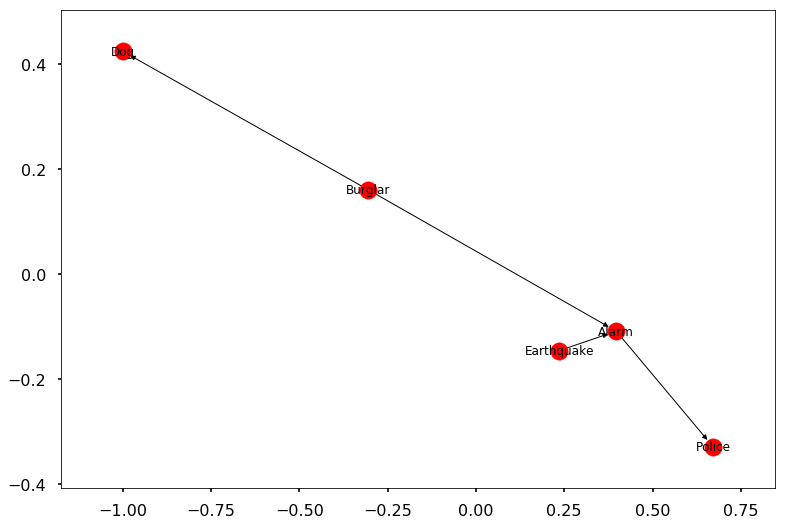

In [23]:
nx.draw_networkx(f)

# Bayesian networks with pgmpy

In [61]:
# pgmpy stand for 'probabilistic graphical models using Python'
# you can install it by running "pip install pgmpy" command in a terminal

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import pgmpy.inference

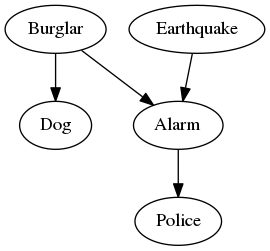

In [27]:
# It's always handy to look at the desired graph every once and then.

Image('graph.png')
#Image('test.png', width=800)

## Adding probabilities to graphs

In [28]:
# The initialization is similar to the one of nx graphs, here we just pass an iterator of edges from g

bn = BayesianModel([('Burglar', 'Dog'), ('Burglar','Alarm'), ('Earthquake', 'Alarm'), ('Alarm','Police')])

In [29]:
# We want to associate some probabilities with the graph, because BN are *probabilistic* models. We do so by 
# first creating a TabularCPD object for each of the nodes. Notice how all of my assumptions are just laid out
# in the open and ready to be scrutinized. This is a general hallmark of Bayesian models - it's all about 
# being explicit! 

# CPD stands for conditional probability distribution. It takes some time to get used to the way this objects 
# are constructed. I found it good to just print the thing and tweak it some more until I see the things are 
# the way I want them to be.

# Example: the way to read the first column is that the probability of Alarm variable being 0 and 1, conditional
# on the variables Earthquake and Burglar, are 0.98 and 0.02, respectively. In general, we need to specify the
# conditional probability for every value of the target variable for all the conditional probabilities defined
# by the possible combinations of its 'parent' variables (the variables from which there are direct arrows to 
# the target variable).

# I assumed that all the variables have only two values (0 and 1) - where 0 stands for no occurrence and 1 
# stands for occurrence. So variable Alarm = 1 means that the alarm went off. But this is not necessarly the 
# case, we could easily have variable_card=4 evidence_card=[3,2] meaning that there are 4 possible values for 
# Alarm variable, 3 for Earthquake and 2 for Burglar. In this case we would need to pass a 4x6 array to the 
# values parameter. 

# One last thing to notice is that all the columns sum up to one. Think of it this way - when we're talking
# about conditional probabilities, we're talking about how the probabilitiy would be distributed given that 
# certain conditions would hold. But the probability would still be a probability, and thus it has to sum up
# to 1. In fact, this is already a simple way to slightly reduce the number of parameters we need to specify,
# namely if we have a target variable that can take n different values, we only need to specify (n-1) different
# values for every condition (combination of values of its parent nodes), because we can simply infer the last
# value by substracting the rest of the values in that column from 1. More mature libraries do in fact use this
# and all kinds of other optimizations, based on the probability calculus, such that the number of parameters
# the end user needs to specify is greatly reduced.

cpd_Alarm = TabularCPD('Alarm', variable_card=2, 
                    values=[
                        [0.98, 0.3, 0.4, 0.1],
                        [0.02, 0.7, 0.6, 0.9]
                    ], 
                    evidence= ['Earthquake', 'Burglar'],
                    evidence_card=[2, 2])
print(cpd_Alarm)

+------------+--------------+--------------+--------------+--------------+
| Earthquake | Earthquake_0 | Earthquake_0 | Earthquake_1 | Earthquake_1 |
+------------+--------------+--------------+--------------+--------------+
| Burglar    | Burglar_0    | Burglar_1    | Burglar_0    | Burglar_1    |
+------------+--------------+--------------+--------------+--------------+
| Alarm_0    | 0.98         | 0.3          | 0.4          | 0.1          |
+------------+--------------+--------------+--------------+--------------+
| Alarm_1    | 0.02         | 0.7          | 0.6          | 0.9          |
+------------+--------------+--------------+--------------+--------------+


In [30]:
# Expand these TabularCPD objects, preferably each in its own cell, to see the assumptions I made when I was 
# specifying the network. Play around with it and see how different observation affect the other variables.

cpd_Police = TabularCPD('Police', variable_card=2, values=[[0.95, 0.02], [0.05, 0.98]], evidence=['Alarm'], evidence_card=[2])
cpd_Burglar = TabularCPD('Burglar', variable_card=2, values=([[0.5,0.5]]))
cpd_Earthquake = TabularCPD('Earthquake', variable_card=2, values=([[0.5,0.5]]))
cpd_Dog = TabularCPD('Dog', variable_card=2, values=([[0.8, 0.1], [0.2, 0.9]]), evidence=['Burglar'], evidence_card=[2])

In [31]:
# We associate the probabilities we defined with TabularCPD objects to the graph structure is simply by
# calling the .add_cpds method of the BayesianModel object we created before:

bn.add_cpds(cpd_Police, cpd_Earthquake, cpd_Alarm, cpd_Burglar, cpd_Dog)

# If you'll re-run this cell multiple times, you'll get a warning for every CPD you'll be rewritting, don't
# get scared the capital letters, you did nothing wrong!

# Once you've associated the cpds with the BN, you might want to check that all the probability distributions
# are properly defined. You can do this with the .check_model() method. If everything is ok, it returns True,
# and throws an error otherwise. Play around - change the probabilities so that the columns don't sum up to one
# or don't add cpd for a node you have in your skeleton BN and run this function to see what happens.

bn.check_model()

True

In [32]:
# You can always print the TabularCPD object to see what it looks like. But maybe you forgot the name you used
# or it was defined by somebody else. What you want to do then is to use the .get_cpds() method and just pass 
# to it the name of the variable you're interested in.

print(bn.get_cpds('Dog'))

+---------+-----------+-----------+
| Burglar | Burglar_0 | Burglar_1 |
+---------+-----------+-----------+
| Dog_0   | 0.8       | 0.1       |
+---------+-----------+-----------+
| Dog_1   | 0.2       | 0.9       |
+---------+-----------+-----------+


In [33]:
# If you just call the method without passing a specific name of a node, you'll get a list of all cpds.

type(bn.get_cpds())

list

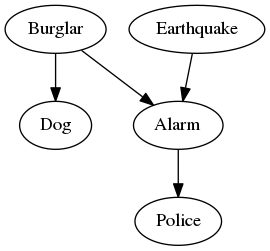

In [34]:
# As said, it's always nice, to remind ourselfs what the graph looks like! That's the beauty of pgms, they're
# highly interpretable (at least at a moderate scale), and easy to inspect visually.

Image('graph.png')

In [35]:
# To do some inference with the BN we just created we have to create a new object by calling a function from 
# pgmpy.inference and passing our model as an argument. This object can then be used to reason with the BN.
# Variable elimination is an algorithm for *exact* computation of posterior probability and has exponential
# time complexity - however, it simple to use and works good for small BN like our toy model.

inference = pgmpy.inference.VariableElimination(bn)

In [36]:
# Say we observe the police came to our house and we're interested in what's the probability that this is due to
# the earthquake causing the alarm to go off. Remember how we encoded our variables - Police=1 is our 'data'.
# We pass the list of variables we're interested in to variables parameter. Our observations are encoded as a
# dictionary with variables as keys and the associated dict values corresponding to the variable values we have
# observed. Play around with this function even before we investigate its returned value. Can you pass any 
# variable to the first parameter? What constraints apply to the dict passed to the evidence parameter?

new_probs = inference.query(variables=['Earthquake'], evidence={'Police': 1})

In [37]:
# What the inference object returns is a dictionary, with keys being the names of the variables we specified in
# the query method call, linked to the 'posterior' probabilities associated with them, after fixed observations.

type(new_probs)

dict

In [38]:
new_probs.items()

dict_items([('Earthquake', <DiscreteFactor representing phi(Earthquake:2) at 0x7f90377b7438>)])

In [39]:
print(new_probs['Earthquake'])

+--------------+-------------------+
| Earthquake   |   phi(Earthquake) |
+==============+===================+
| Earthquake_0 |            0.3398 |
+--------------+-------------------+
| Earthquake_1 |            0.6602 |
+--------------+-------------------+


In [40]:
# Let's compare this to the prior probability of Earthquake variable:

print(bn.get_cpds('Earthquake'))

+--------------+-----+
| Earthquake_0 | 0.5 |
+--------------+-----+
| Earthquake_1 | 0.5 |
+--------------+-----+


In [41]:
# What happens if in addition to observing police in front of our house we also hear our dog bark? Try to 
# convince yourself this is (at least qualitatively) correct result. Why is there a change in the posteriors?

print(inference.query(['Earthquake'], evidence={'Police':1, 'Dog': 1})['Earthquake'])

+--------------+-------------------+
| Earthquake   |   phi(Earthquake) |
+==============+===================+
| Earthquake_0 |            0.4120 |
+--------------+-------------------+
| Earthquake_1 |            0.5880 |
+--------------+-------------------+


## Three basic structures and independences

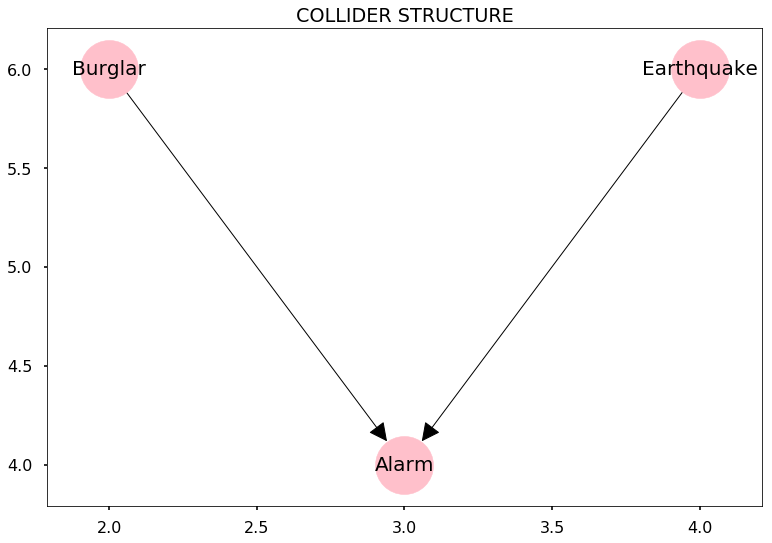

In [42]:
nx.draw_networkx(bn.subgraph(['Alarm', 'Earthquake', 'Burglar']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('COLLIDER STRUCTURE');

In [43]:
# If we know that there was burglary, this doesn't tell us anything about there being an earthquake, and vice 
# versa. However, if we know there was an alarm we will consider earthquake to be more likely, then if we also
# knew there was a burglary. Parent nodes in a colider structure are said to be conditionally dependent on the 
# common descendant. Police comming would also suffice to make them dependent, because the information flows 
# back to the alarm node. That is why when we provided additional evidence for there being a burglar (e.g. we
# we observed dog barking), we indirectly provided evidence against there being an earthquake.

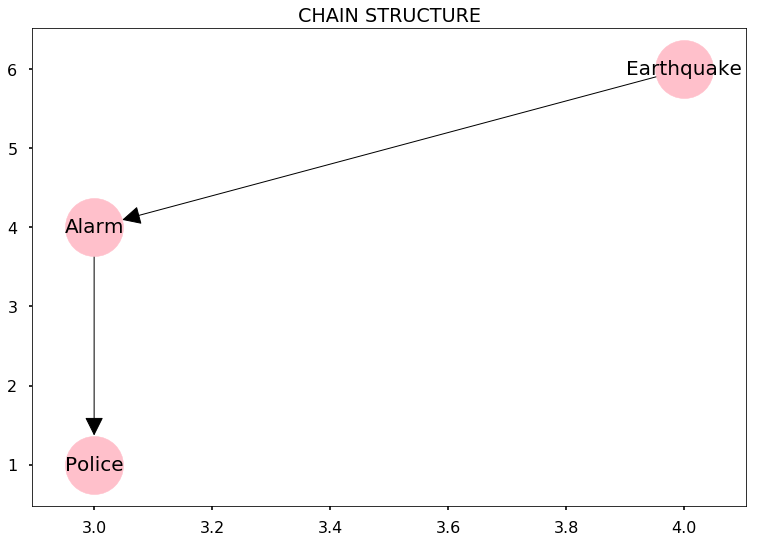

In [44]:
nx.draw_networkx(bn.subgraph(['Alarm', 'Earthquake', 'Police']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('CHAIN STRUCTURE');

In [45]:
# If we know there is an earthquake we'll probably expect police to come more than if there's no earthquake. 
# However if we hear the alarm while walking on the street, we imagine the police is probably on already the  
# way, no matter if we shortly after notice that there's an earthquake. If we know the status of the alarm,
# observing the status of the earthquake is not informative of the police coming or not.

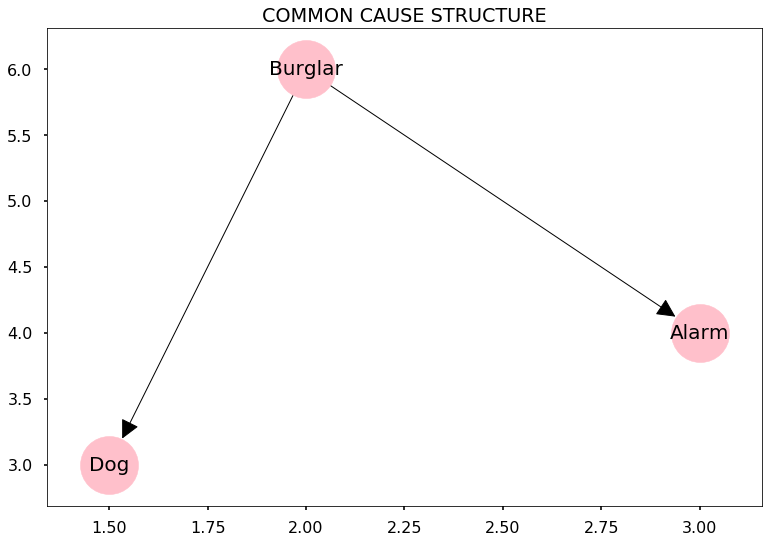

In [46]:
nx.draw_networkx(bn.subgraph(['Dog', 'Alarm', 'Burglar']),
                 pos=positions, node_size=15**3, node_color='pink', font_size=20, arrowsize=40)

plt.title('COMMON CAUSE STRUCTURE');

In [47]:
# If we hear the alarm we will likely expect the dog to start barking, more than if we don't hear it go off. 
# However if we see a burglar we're really condfident that the dog will bark, regardles of whether we hear
# the alarm or not.

In [48]:
# One way to check whether the two variables are *unconditionally* dependent is by calling the BayesianModel 
# method is_active_trail(). In words, if the trail is active (return True), then there's 'information flow' 
# from start to end node. This means that knowing something about one of the nodes, will be informative of the
# possible state of the other - e.g. nodes are dependent. 

# Note that we could switch the start and the end node - information always flows in both directions.

bn.is_active_trail(start='Earthquake', end='Burglar')

False

In [49]:
# We can check for *conditional* dependence as well, by passing a list of observed variables to the function.
# If the function returns True, then knowing something about the observed variable establishes (or at least
# doesn't cut) the information flow between the start and the end node. 

# Note that the actual value observed doesn't matter - any kind of information will (or will not) do. 

bn.is_active_trail(start='Earthquake', end='Burglar', observed=['Police'])

True

In [50]:
# Inference of independences that follow from the graph specification is computationally well studied and 
# there's plenty of literature (try to read something about 'd-separation'), but for now, we'll treat it as
# a black box feature of the pgmpy. 

# The way to get all the independences that hold between the variables in a BayesianModel object is to simply
# call the .get_independences() method.

# The way to read 'X _|_ Y | Z' is that X is conditionally independent of Y if we know Z. In terms of active 
# trails - if we observe Z there is no information flow between X and Y. Now, it may very well be that also
# 'X _|_ Y' holds by itself, meaning that X and Y are (unconditionally) independent, that is, if nothing is
# observed there's no information flow (active trail) between X and Y.

bn.get_independencies()

(Burglar _|_ Earthquake)
(Burglar _|_ Earthquake | Dog)
(Burglar _|_ Police | Alarm)
(Burglar _|_ Police | Dog, Alarm)
(Burglar _|_ Police | Alarm, Earthquake)
(Burglar _|_ Police | Dog, Alarm, Earthquake)
(Dog _|_ Earthquake)
(Dog _|_ Alarm, Police, Earthquake | Burglar)
(Dog _|_ Police | Alarm)
(Dog _|_ Police, Earthquake | Burglar, Alarm)
(Dog _|_ Alarm, Earthquake | Burglar, Police)
(Dog _|_ Alarm, Police | Burglar, Earthquake)
(Dog _|_ Police | Alarm, Earthquake)
(Dog _|_ Earthquake | Burglar, Alarm, Police)
(Dog _|_ Police | Burglar, Alarm, Earthquake)
(Dog _|_ Alarm | Burglar, Police, Earthquake)
(Alarm _|_ Dog | Burglar)
(Alarm _|_ Dog | Burglar, Police)
(Alarm _|_ Dog | Burglar, Earthquake)
(Alarm _|_ Dog | Burglar, Police, Earthquake)
(Earthquake _|_ Burglar, Dog)
(Earthquake _|_ Dog | Burglar)
(Earthquake _|_ Burglar | Dog)
(Earthquake _|_ Police | Alarm)
(Earthquake _|_ Dog, Police | Burglar, Alarm)
(Earthquake _|_ Dog | Burglar, Police)
(Earthquake _|_ Police | Dog, Alarm)

### A way to express 'stochastic' independence of two variables $X,Y$ is to state that knowing the value of one doesn't tell you anything about another:

$$\Large X \perp Y \;\; \Rightarrow \;\; P(X\mid Y) = P(X)$$

### This can be generalized to speak about **conditional** independence:

$$ \Large X \perp Y \mid Z \;\; \Rightarrow \;\; P(X \mid Y, Z) = P(X \mid Z)$$

### In fact, every Bayesian network is required to satisfy a specific condition called *Parental Markov condition* (PMC). It simply states, that the probability distribution we use to define the relationships between the variables in the graph, must be such that each variable is independent of its non-descendants given its parent:

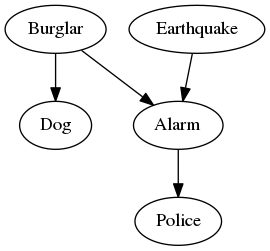

In [51]:
Image('graph.png')

In [52]:
# For instance, regarding the graph above, Alarm is independent of Dog given Earthquake and Burglar. The latter
# two are the parent nodes of Alarm (there's a direct edge from both of them to the Alarm variable). Moreover,
# Dog is a non-descendant of the Alarm, because there's no way to follow the direction of edges to traverse the
# graph from Alarm to Dog. However, because we can do so for Police, we say that the Police is a descendant of 
# the Alarm node (in fact the only one in our BN). Thus, even if we are given the values of Alarm's parent nodes
# Alarm and Police are still dependent variables. 

# Root nodes - that are the nodes without parents (in our graph Earthquake and Burglar) are unconditionally 
# independent of all of their non-descendants. We can say that the parents of a root node is just an empty set.

### Relying on the specifics of the representation allows for efficient way of computation. For instance, because of the PMC we calculate the joint probability of the whole graph with nodes $X_i$ by:

$$ \Large \prod_i P(X_i \mid Parents(X_i))$$

In [53]:
# The above is just a short notation for multiplying all the terms of conditional probability for a node, 
# conditioned on its parent. For root nodes this term is just their 'prior' or marginal probability.

### Let's use the initials to abbreviate the names of the nodes (except for Police we'll use 'C', to avoid confusion with the probability function P). For our toy BN the above expression would translate into:

$$ \Large P(A, B, C, D, E) = P(D\mid B) \cdot P(A \mid B,E) \cdot P(C \mid A) \cdot P(B) \cdot P(E)$$

In [54]:
# Of course this has to be done for all the possible values of each of the variable. Because we assumed each
# node only has two possible values that would result in 2**5 terms to fully (and explicitly) specify the joint
# probability distribution.

# Reasoning with random variables

### When we define probabilities, we define them for a specific context. This context is often called 'experimental space' or 'sample space' and is denoted with $\Omega$. It is essentially a set of *all* possible outcomes of an experiment (relative to how the experiment is defined), e.g.: 

### ¤ Rolling a 6-faced die: $\; \Omega$ = {1,2,3,4,5,6} or $\Omega$ = {even, odd}
### ¤ Flipping a coin: $\; \Omega$ = {Heads, Tails}

### Next we'll make use of special *functions* called 'random variables', that assign a (real) number to every element of an experimental space:  

$$\Large X: \Omega \mapsto \mathbb{R}$$

### Now we can talk about the probability of a r.v. 'spitting out' a certain value, *e.g.* $\; P(X = x)$.

In [55]:
# Now we can see that we've been working with random variables more or less all the time. Specifically we made 
# use of so-called 'indicator' random variables. An indicator random variable, call it I, only has two values, 
# 0 and 1. If the event that is indicated by I happens, then I = 1, otherwise I = 0. To ask what's the
# probability of that event not occuring is therefore to ask what's the value of P(I=0).

In [56]:
# All of what we stated above still holds, probabilities we assign to different values of a given random 
# variable have to sum up to one and have to be non-negative.

In [57]:
# We can make use of the fact that random variable, despite their misleading name, are *functions* to derive
# another very important law in the probability theory. The so-called LAW OF TOTAL PROBABILITY (LTP):

### If we know $X=x$, the probabilities of $Y=y$ might change, i.e. $P(Y=y) \neq P(Y=y\mid X=x)$, but they still have to sum up to 1. Hence,

$$ \Large
\begin{align*}
P(X=x) &= P(X=x) \cdot 1 \\ 
& \\
&= P(X=x) \cdot \sum_y P(Y=y \mid X = x) \\
& \\
&= \sum_y P(X=x) \cdot P(Y = y \mid X = x) \\
& \\
&= \sum_y P(X=x, Y=y) \\
& \\
&= \sum_y P(X=x \mid Y=y) \cdot P(Y=y)
\end{align*}
$$

In [58]:
# Now, we could do this also without random variables, and in fact, the derivation you'll often see in the 
# literature will probably use sets or propositions. However, if we do so, we have to explicitly assume some
# more conditions, that come for free with random variables, just because that's the way they're defined.

In [59]:
# Applying this is what is often called 'integrating out' or 'marginalization'. It is useful because we can
# always get rid of a variable from an expression for a joint probability, simply by pluggin in all of its 
# values and summing the number up. 

In [60]:
# Even more importantly, now we can see why we only need to specify prior probabilities for the root nodes 
# and conditional probabilities for the rest. Because those are already sufficient to get the marginal (prior)
# probabilities of other nodes, simply by applying the LTP. 

### Now we can also rewrite the Bayes theorem for random variables, and show that we only need to have prior belief about the 'hypothesis' variable:

$$ \Large 
\begin{align*}
P(H=h \mid E=e) &= \dfrac{P(E = e \mid H=h) \cdot P(H = h)}{P(E = e)} \\
& \\
&=  \dfrac{P(E = e \mid H=h) \cdot P(H = h)}{\sum_h P(E = e, H=h)} \\
& \\
&=  \dfrac{P(E = e \mid H=h) \cdot P(H = h)}{\sum_h P(E = e \mid H=h) \cdot P(H=h)}
\end{align*}
$$

## Reasoning with the BN structure:

### Say that there we hear the dog bark and now we want to feed this information into our Bayesian network. Just by expression of conditional  probability alone, we would have to calculate:

$$ \Large \begin{align*}
P_{new}(A, E, B, C) &= P(A, E, B, C \mid D=1) \\
&\\
&= \dfrac{P(A, E, B, C, D=1)}{P(D=1)} \\
&\\
&= \dfrac{P(A, E, B, C, D=1)}{\sum_{a,e,b,c} P(A, E, B, C, D=1)} \\
\end{align*}
$$

### But because of the structure of the Bayesian network, we know that PMC implies that $D$ is independent of its nondescendants $(E,A,C)$, given its parent $(B)$, so the above simplifies to:

$$ \Large P_{new}(A, E, B, C) = \dfrac{P(A, E, B, C, D=1)}{\sum_{b} P(D=1 \mid B=b) \cdot P(B=b)}$$